In [1]:
import plotnine as p9
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
from src import constants as const
    
%load_ext autoreload
%autoreload 2

In [2]:
x = np.array([1,2,2,3,4,4,4,4,4,4,5,7,8,9])
n = x.shape[0]

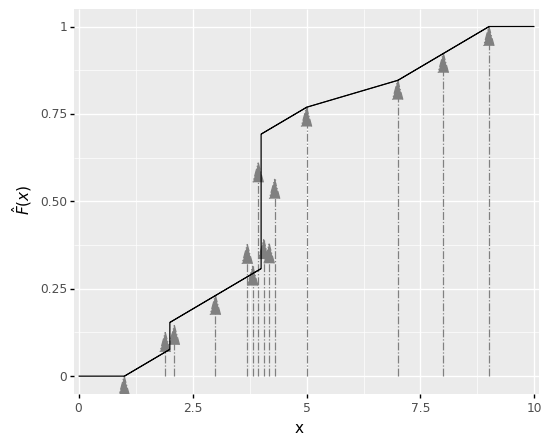

In [14]:
from sklearn.preprocessing import QuantileTransformer
from tabGAN import TabGAN
def plot_qt(x, randomized=False, x_margin_percent=0.05, x_margin = 0, distribution="uniform",
           save_dir=None, save_path=None, width=6, height=5, qtr_spread=1):
    x = np.array(x)
    qt = QuantileTransformer(n_quantiles = x.shape[0], output_distribution=distribution)
    x_boundaries = [np.min(x), np.max(x)]
    x_range = x_boundaries[1] - x_boundaries[0]
    x_long = np.linspace(x_boundaries[0] - x_margin_percent * x_range - x_margin,
                         x_boundaries[1] + x_margin_percent * x_range + x_margin, 1000)
    qt.fit(x.reshape((x.shape[0], 1)))
    df = pd.DataFrame({"x_val": x_long, "q": qt.transform(x_long.reshape((x_long.shape[0], 1))).flatten()})
    
    p = p9.ggplot(df)
    tg = TabGAN(pd.DataFrame({"x": x}), quantile_transformation_int=True, qt_distribution=distribution,
        quantile_rand_transformation=randomized, qtr_lbound_apply=0, qtr_spread=qtr_spread)
    y_end = tg.data_num_scaled.flatten()
    if distribution == "uniform":
        ylabel = r"$\hat F(x)$"
        y_begin = np.where(y_end == 0, -0.001, 0)
    elif distribution == "normal":
        ylabel = r"$\Phi^{-1}(\hat F(x))$"
        y_begin = np.min(df["q"]) - 1e-7
    df_quiver = pd.DataFrame({"x_val": x.astype("float"),
                              "y_begin": y_begin,
                              "y_end": y_end})
    x_unique, x_count = np.unique(x, return_counts=True)
    for x_i, count_i in zip(x_unique[x_count > 1], x_count[x_count > 1]):
        df_quiver.loc[df_quiver["x_val"] == x_i, "x_val"] += np.linspace(-0.05 * count_i, 0.05 * count_i, count_i) 
    df_quiver_long = pd.wide_to_long(df_quiver, ["y"], i="x_val", j="Arrow_part", sep='_', suffix="(begin|end)").reset_index()
    p += p9.geom_line(data=df_quiver_long, mapping=p9.aes(x="x_val", y="y", group="x_val"),
                      color="grey", linetype="-.", 
                      arrow=p9.arrow(angle=15, type="closed"))
    p += p9.geom_step(mapping=p9.aes(x = "x_val", y = "q"))
    p += p9.scale_x_continuous(expand = [0.01, 0])
    p += p9.xlab("x") + p9.ylab(ylabel)
    p += p9.theme(figure_size=(width, height))
    if save_path is not None:
        if save_dir is not None:
            save_path = os.path.join(save_dir, save_path)
        p.save(filename=save_path, width=width, height=height, verbose=False)
    p.draw()
               
plot_qt(x, distribution="uniform", randomized=True, x_margin_percent=0, x_margin=1, width=6, height=5)

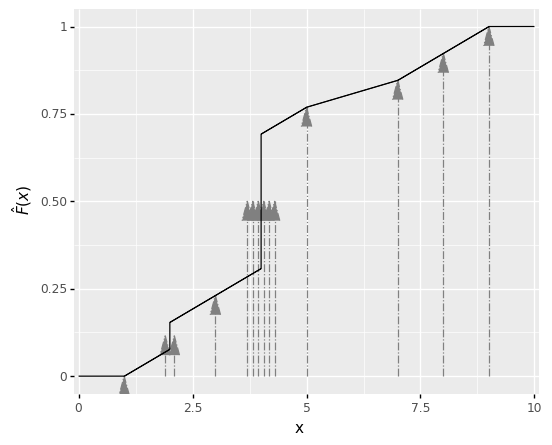

In [4]:
plot_qt(x, distribution="uniform", x_margin_percent=0, x_margin=1, width=6, height=5,
       save_dir=const.dir.images(), save_path="quantile_transform_uniform_example.svg")

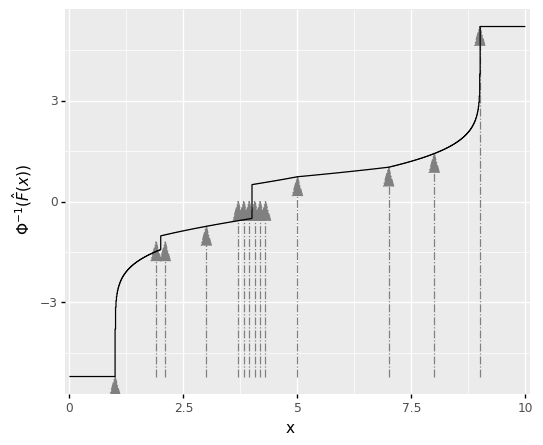

In [5]:
plot_qt(x, distribution="normal", x_margin_percent=0, x_margin=1, width=6, height=5,
       save_dir=const.dir.images(), save_path="quantile_transform_normal_example.svg")

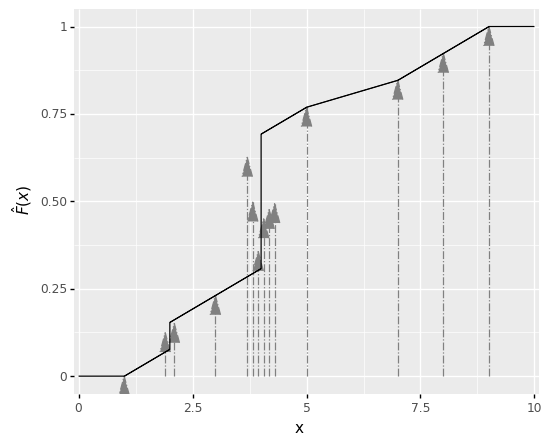

In [20]:
plot_qt(x, distribution="uniform", randomized=True, x_margin_percent=0, x_margin=1, width=6, height=5,
       save_dir=const.dir.images(), save_path="randomized_quantile_transform_uniform_example.svg")

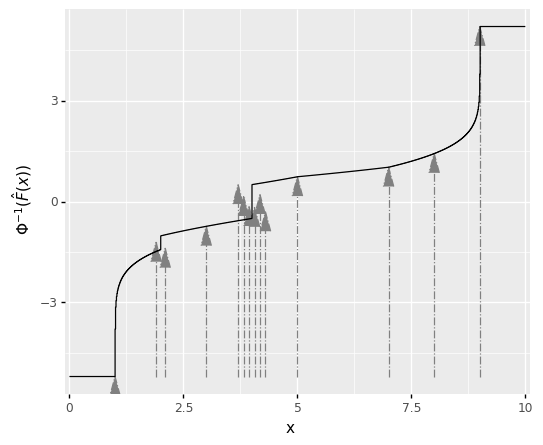

In [21]:
plot_qt(x, distribution="normal", randomized=True, x_margin_percent=0, x_margin=1, width=6, height=5,
       save_dir=const.dir.images(), save_path="randomized_quantile_transform_normal_example.svg")

In [202]:
qt = QuantileTransformer()
x = np.array([1,2,2,3,4,4,4,4,4,4,5,7, 8, 9, 10])
qt.fit(x.reshape((x.shape[0], 1)))
print(qt.transform([[1.9999], [2], [2.001]]).flatten())
print(qt.transform([[3.999], [4], [4.001]]).flatten(), np.mean([qt.transform([[4.001]]).flatten(), qt.transform([[3.999]]).flatten()]))

[0.07142143 0.10714286 0.14292857]
[0.28564286 0.46428571 0.64292857] 0.4642857142857143


C:\Users\Arne\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (15). n_quantiles is set to n_samples.


In [188]:
a = np.array([1., 2., 2., 3., 4., 4., 4., 4., 4., 4., 5., 7., 8.])
b = np.array(
    [0.,  0.08333333, 0.16666667, 0.25, 0.33333333, 0.41666667, 0.5, 0.58333333, 0.66666667, 0.75, 0.83333333, 0.91666667, 1.])
print(np.interp([2], a, b))
print(-np.interp([-2], -a[::-1], -b[::-1]))


[0.16666667]
[0.08333333]


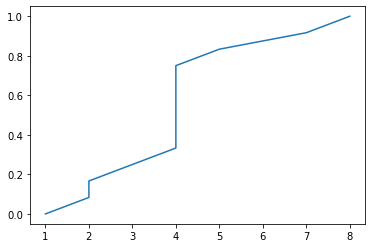

In [142]:
plt.plot(a, b)

In [139]:
from sklearn.preprocessing import QuantileTransformer
??QuantileTransformer

In [138]:
-np.interp([-2], -a[::-1], -b[::-1])

array([0.08333333])

In [ ]:
[1., 2., 2., 3., 4., 4., 4., 4., 4., 4., 5., 7., 8.]

In [120]:
np.interp([2], np.array([1,2,2,3]), np.array([5,6,7,8]))

array([7.])

In [118]:
[1,2,2,3][::-1]

[3, 2, 2, 1]

In [119]:
[5,6,7,8][::-1]

[8, 7, 6, 5]

In [124]:
df_quiver.loc[df_quiver["x_val"] == 2.057763]

,x_val,y_begin,y_end


In [69]:
df_quiver = pd.DataFrame({"x_val": x + np.random.uniform(-0.1, 0.1, size=x.shape[0]), "y_begin": 0, "y_end": q})
df_quiver_long = pd.wide_to_long(df_quiver, ["y"], i="x_val", j="Arrow_part", sep='_', suffix="(begin|end)").reset_index()
df_quiver_long

,x_val,Arrow_part,y
0,0.990003,begin,0.000000
1,2.057763,begin,0.000000
2,1.917055,begin,0.000000
3,3.025090,begin,0.000000
4,4.081067,begin,0.000000
5,4.013569,begin,0.000000
6,4.055853,begin,0.000000
7,4.997705,begin,0.000000
8,6.075338,begin,0.000000
9,7.051365,begin,0.000000
